In [2]:
import pandas as pd

In [16]:
df = pd.read_csv('/users/brucepereira/desktop/air/air_pollution_data_upd.csv')
df.head()

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,4_Eur,ESP,Spain,A Coruna,2013.0,"V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...",23.238,11.491,28.841,87.0,46.0,93.0,"Urban, Urban, Suburban",NaN,NaN,246056.0,"manual, manual, manual, manual",43.367900,-8.418571,1
1,4_Eur,ESP,Spain,A Coruna,2014.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",27.476,15.878,19.575,96.0,88.0,95.0,"Urban, Urban, Suburban",NaN,NaN,246056.0,NaN,43.368033,-8.418233,1
2,4_Eur,ESP,Spain,A Coruna,2015.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",25.515,14.004,22.731,98.0,71.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,246056.0,NaN,43.370375,-8.422900,1
3,4_Eur,ESP,Spain,A Coruna,2016.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",23.057,13.160,20.204,98.0,98.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,246056.0,NaN,43.370375,-8.422900,1
4,4_Eur,ESP,Spain,A Coruna,2017.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",26.849,14.114,21.543,97.0,97.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,246056.0,NaN,43.370375,-8.422900,1


In [98]:
df.tail()

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
40093,6_Wpr,KOR,Republic of Korea,경기도,2017.0,V5.0 (2022),57.335,36.457,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.337200,126.724100,1
40094,6_Wpr,KOR,Republic of Korea,경기도,2018.0,V5.0 (2022),50.838,31.586,0.027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.337200,126.724100,1
40095,6_Wpr,KOR,Republic of Korea,경기도,2019.0,V5.0 (2022),55.568,31.013,0.028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.337200,126.724100,1
40096,6_Wpr,CHN,China,虎英公园北,2018.0,V5.0 (2022),NaN,30.649,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,NaN,23.012778,113.794444,1
40097,6_Wpr,CHN,China,虎英公园北,2019.0,V5.0 (2022),NaN,29.731,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,NaN,23.012778,113.794444,1


## Countries

In [125]:
df['country_name'].value_counts()

country_name
Italy                               4035
United States of America            3888
China                               3882
Spain                               3343
Germany                             3266
                                    ... 
Kyrgyzstan                             1
Tajikistan                             1
Algeria                                1
Liechtenstein                          1
Lao People's Democratic Republic       1
Name: count, Length: 124, dtype: int64

In [126]:
df['country_name'].describe()

count     40098
unique      124
top       Italy
freq       4035
Name: country_name, dtype: object

In [127]:
df['country_name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 40098 entries, 0 to 40097
Series name: country_name
Non-Null Count  Dtype 
--------------  ----- 
40098 non-null  object
dtypes: object(1)
memory usage: 313.4+ KB


In [128]:
df['country_name'].isnull().sum()

0

In [129]:
df['country_name'].isna().sum()

0

In [132]:
countries = df.groupby('who_region')['country_name'].nunique().sum
countries

<bound method Series.sum of who_region
1_Afr      13
2_Amr      23
3_Sear      9
4_Eur      49
5_Emr      14
6_Wpr      13
7_NonMS     3
Name: country_name, dtype: int64>

In [103]:
for region, data in df.groupby('who_region'):
    data_region['country_name'].tolist()
    print(f"region {region}:")


region 1_Afr:
region 2_Amr:
region 3_Sear:
region 4_Eur:
region 5_Emr:
region 6_Wpr:
region 7_NonMS:


In [245]:
Europe = df[df['who_region'] == '4_Eur']['country_name']
Europe

0         Spain
1         Spain
2         Spain
3         Spain
4         Spain
          ...  
40085    Poland
40086    Poland
40087    Poland
40088    Poland
40089    Poland
Name: country_name, Length: 26801, dtype: object

In [188]:
Germany = df.loc[df['who_region'] == '4_Eur', 'country_name'].iloc[10]
German_cities = df.loc[df['country_name'] == Germany, 'city']
German_cities.value_counts()

city
Aachen            10
Lubeck            10
Mainz             10
Magdeburg         10
Lunen             10
                  ..
Naila              1
Deisterstrasse     1
Schuhstrasse       1
Netzschkau         1
Sonnenbuhl         1
Name: count, Length: 476, dtype: int64

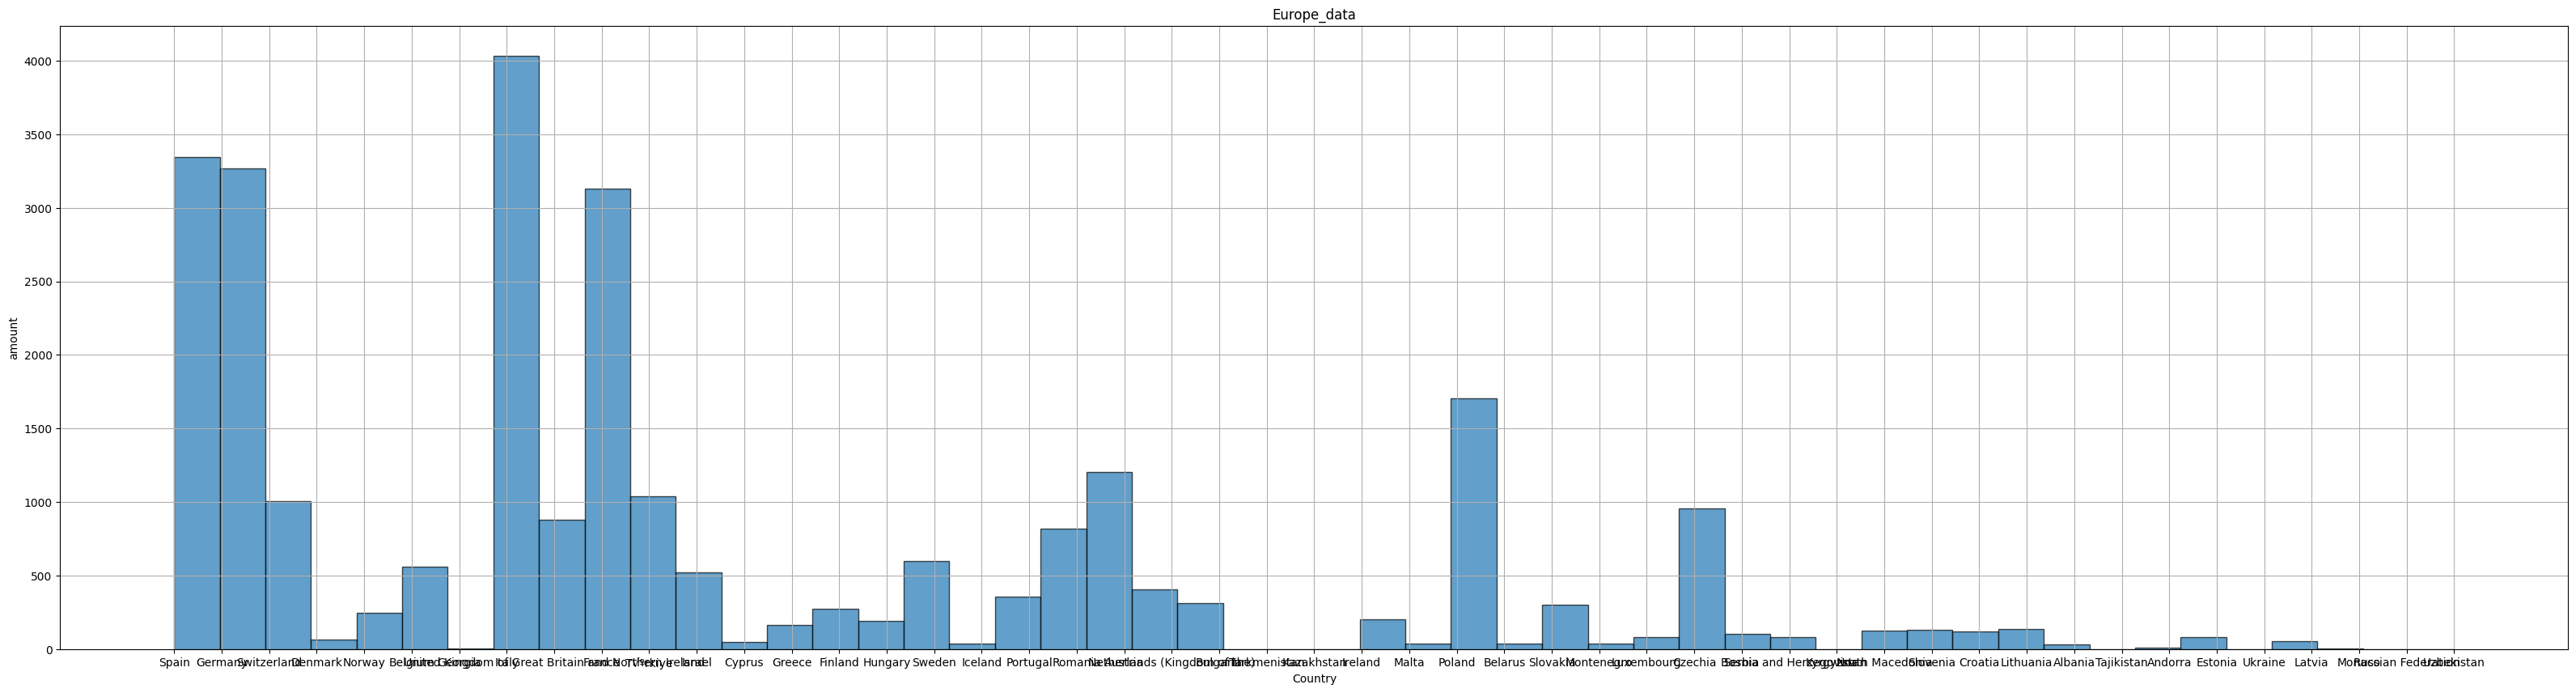

In [131]:
plt.figure(figsize=(40, 10))
plt.hist(Europe, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Country')
plt.ylabel('amount')
plt.title('Europe_data')
plt.grid(True)
plt.show()

## Cities

In [178]:
df['city'].describe()

count      40098
unique      7136
top       Cuenca
freq          21
Name: city, dtype: object

In [177]:
df['city'].value_counts()

city
Cuenca                   21
Salamanca                17
Laval                    17
Anyang                   17
Arad                     17
                         ..
Hnusta                    1
San Giorgio Di Nogaro     1
Thokoza                   1
Hoboken                   1
Oinofyta                  1
Name: count, Length: 7136, dtype: int64

In [23]:
df['city'].isnull().sum()

0

In [243]:
euro_cities = df.loc[df['who_region'] == '4_Eur', 'city']
euro_cities.value_counts().sum()

26801

In [226]:
Spain = df.loc[df['who_region'] == '4_Eur', 'country_name'].iloc[0]
Spanish_cities = df.loc[df['country_name'] == Spain, 'city']
Spanish_cities.value_counts().sum()

3343

In [227]:
top_ten_Sp = Spanish_cities.head(71)
top_ten_Sp

0        A Coruna
1        A Coruna
2        A Coruna
3        A Coruna
4        A Coruna
          ...    
387           Aia
388           Aia
389           Aia
390           Aia
402    Aiguafreda
Name: city, Length: 71, dtype: object

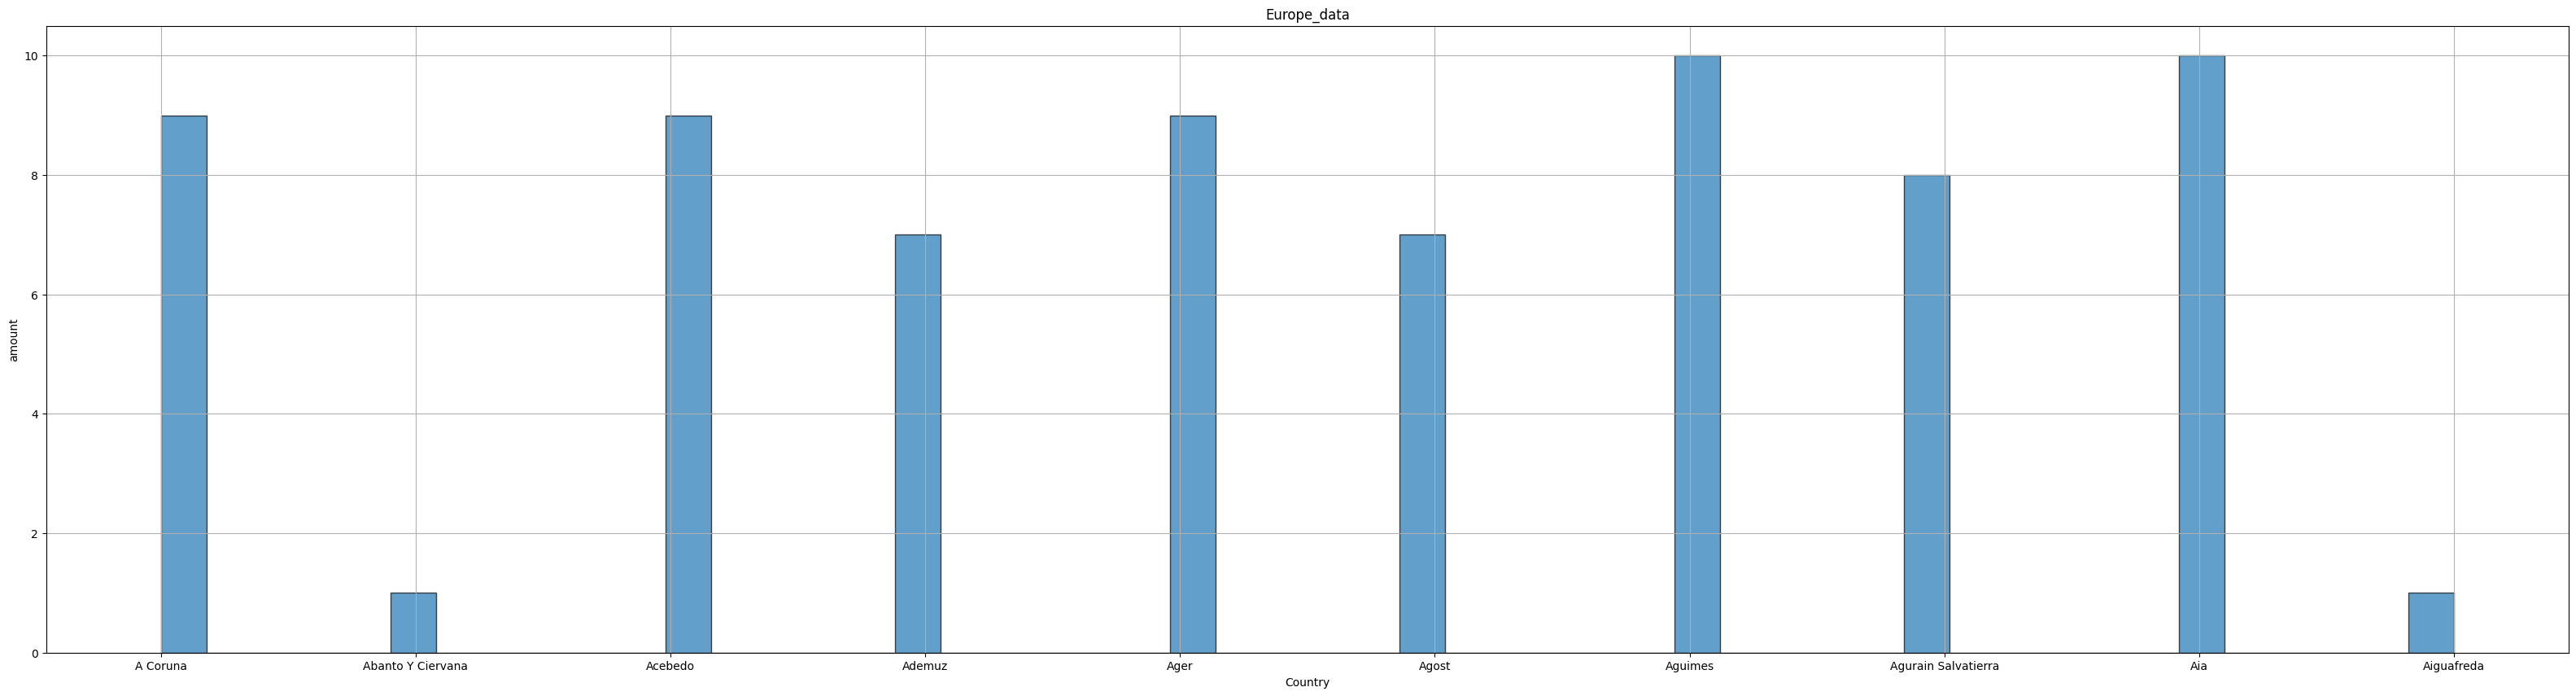

In [228]:
plt.figure(figsize=(40, 10))
plt.hist(top_ten_Sp, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Country')
plt.ylabel('amount')
plt.title('Europe_data')
plt.grid(True)
plt.show()